In [18]:
#Importo librerías
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Lectura del dataset
diabetes_dataset = pd.read_csv("diabetes.csv")


In [20]:
#Muestro los 5 primeros elementos de dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
#cantidad de filas y columnas
diabetes_dataset.shape

(768, 9)

In [22]:
#información estadística
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
#cantidad de diabéticos (1) y no diabéticos (0) en el dataset
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
#calculo la media de cada variable para cada grup
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


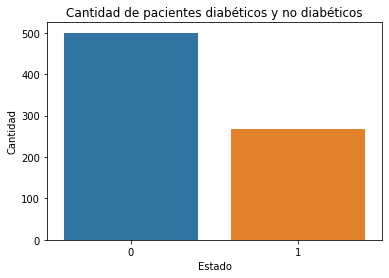

In [25]:
#Crear diagrama de barras
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Cantidad de pacientes diabéticos y no diabéticos')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

In [26]:
#el % de glucosa en sangre en diabéticos es mayor que los que no lo son.
#A su vez, la personas de mayor edad son más suceptibles a tener diabetes.
print(diabetes_dataset.groupby('Outcome').mean())

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


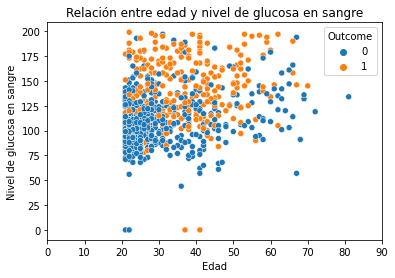

In [27]:
# gráfico de dispersión que indica la relación entre la edad y el nivel de glucosa en sangre de los pacientes diabéticos y no diabéticos
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=diabetes_dataset)
plt.title('Relación entre edad y nivel de glucosa en sangre')
plt.xlabel('Edad')
plt.ylabel('Nivel de glucosa en sangre')
plt.xticks(range(0, 100, 10))
plt.show()

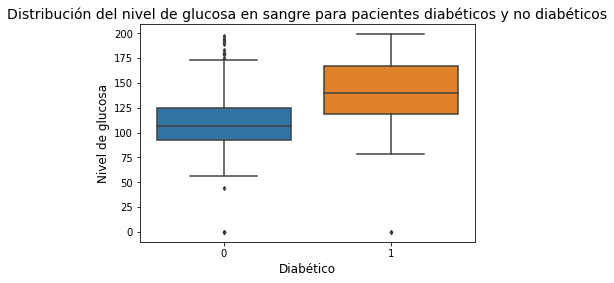

<Figure size 576x432 with 0 Axes>

In [28]:
# diagrama de cajas y bigotes que compara la distribución del nivel de glucosa en sangre entre pacientes diabéticos y no diabéticos en el conjunto de datos. 
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_dataset, fliersize=3)
plt.title('Distribución del nivel de glucosa en sangre para pacientes diabéticos y no diabéticos', fontsize=14)
plt.xlabel('Diabético', fontsize=12)
plt.ylabel('Nivel de glucosa', fontsize=12)
plt.figure(figsize=(8,6))
plt.show()

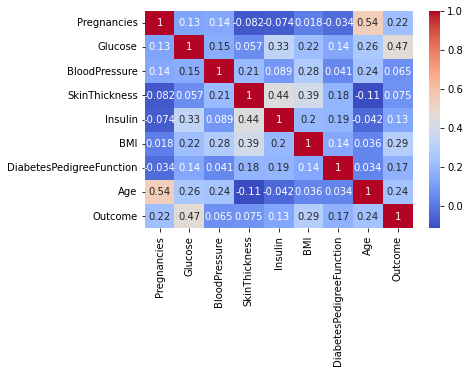

In [29]:
#matriz de correlación entre las variables
corr = diabetes_dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [30]:
#separo los datos y los labels
x = diabetes_dataset.drop(columns='Outcome', axis=1)

In [31]:
#data standardization
scaler = StandardScaler()
scaler.fit(x)
data_estadarizada = scaler.transform(x)
data_estadarizada

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [32]:
#entrenamiento del modelo
x = data_estadarizada
y = diabetes_dataset['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [33]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [34]:
#resultado del accurancy sobre los datos del entrenmiento
x_train_prediction = classifier.predict(x_train)
training_data_accurancy = accuracy_score(x_train_prediction, y_train)
training_data_accurancy


0.7866449511400652

In [36]:
#resultado del accurancy sobre los datos de prueba
x_test_prediction = classifier.predict(x_test)
testing_data_accurancy = accuracy_score(x_test_prediction, y_test)
testing_data_accurancy

0.7727272727272727

In [38]:
#Modelo predictivo
input_data = (1,89,66,23,94,28.1,0.167,21)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
std_data

prediction = classifier.predict(std_data)
prediction

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
